# Assignment \#3 : Binary Systems

Kaimi Kahihikolo

Due: 11 February 2019

In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as const

In [2]:
from IPython.display import Math, display

def view_math(math):
    """
    Function to render LaTeX expressions
    """
    display(Math(math))

___
## (1) An Eclipsing Binary in the LMC

Data taken from Pietrzynski et al. 2009, ApJ, 697, 862. We will assume that the orbits are circular, which is OK, because the eccentricity is small. We also assume that the orbital inclination is 90 degrees, which again is close to the truth.

___
## (1.1) Orbital size, sum of stellar masses

The orbital period is 214.37 days. The semiamplitudes K are 32.65 and 33.67 km/s. **Calculate the orbital size (a1 + a2).** Recall, 
$$\begin{align} Pv_1 &= 2\pi a_1 \\  Pv_2 &= 2\pi a_2 \end{align}$$

In [3]:
P = 214.37 * u.day
K1 = 32.65 * u.km / u.s
K2 = 33.67 * u.km / u.s

In [4]:
a1 = ((P * K1)/(2*np.pi)).to('m')
a2 = ((P * K2)/(2*np.pi)).to('m')
a = a1 + a2

view_math(f"a_1 + a_2 = {a.to('AU').round(3)}")

<IPython.core.display.Math object>

Use this result to calculate the sum of the stellar masses. Recall,

$$P = \frac{2\pi}{\Omega}$$

where,

$$\Omega = \sqrt{\frac{G(M_1 + M_2)}{(a_1 + a_2)^3}}$$

Therefore, by solving for $(M_1 + M_2)$, we get,

$$M_1 + M_2 = \frac{4\pi^2 (a_1+a_2)^3}{G P^2}$$

In [5]:
M = (4.*np.pi**2*(a)**3)/(const.G*P**2).decompose()

view_math(f"\t M_1 + M_2 = {M.to('kg')}")

print(f"\t Which is about {(M/const.M_sun).round(3)} times more massive than the Sun.")

print("\t (I am just checking if the number looks reasonable)")

<IPython.core.display.Math object>

	 Which is about 6.479 times more massive than the Sun.
	 (I am just checking if the number looks reasonable)


___
## (1.2) Mass Ratio and Individual Masses

Calculate the mass ratio from the ratio of the semiamplitudes, and calculate the individual masses.

Recall,

$$\frac{v_2}{v_1} = \frac{M_1}{M_2}$$

In [6]:
mass_ratio = K2/K1

view_math(r"\frac{M_1}{M_2} = "+f"{mass_ratio.round(3)}")

<IPython.core.display.Math object>

Recall, the individual masses can be computed by noticing:

$$\begin{align} M_1 &= \frac{M\cdot(a - a_1)}{a} \\ M_2 &= \frac{M\cdot(a - a_2)}{a}\end{align}$$

In [7]:
M1 = M*(a - a1)/a
view_math(f"M_1 = {M1.to('M_sun').round(2)}")

M2 = M*(a - a2)/a
view_math(f"M_2 = {M2.to('M_sun').round(2)}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

___
## (1.3) Angular Sizes and Distances to the LMC

The values of the apparent magnitude K (do not confuse with the semiamplitude K) are 14.895 and 15.446 for the two binary components. The values of the colors V-K are 1.843 and 1.749. The equation for the Barnes-Evans relation is

$$K + 5\log{\phi} = 2.76 + 0.252(V-K)$$

**Calculate the angular sizes.**

In [8]:
Kmag_1 = 14.895
Kmag_2 = 15.446

V_K_1 = 1.843
V_K_2 = 1.749

In [9]:
phi_1 = 10**((690. - 250.* Kmag_1 + 63. * V_K_1)/1250.) * u.mas

phi_2 = 10**((690. - 250.* Kmag_2 + 63. * V_K_2)/1250.) * u.mas

view_math(f'\phi_1 = {phi_1.round(4)}')
view_math(f'\phi_2 = {phi_2.round(4)}')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The analysis of the light curve has provided the physical radii of the two stars, $26.06$ and $19.76$ solar radii. **Calculate the distances to both stars.**

In [10]:
d1 = (26.06 * u.Rsun).to('kpc') / np.tan((phi_1/2.0).to('rad'))

d2 = (19.76 * u.Rsun).to('kpc') / np.tan((phi_2/2.0).to('rad'))

view_math(f'd_1 = {d1.round(3)}')
view_math(f'd_2 = {d2.round(3)}')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The actual distance to the LMC is 49.97 ± 0.19 (statistical) ± 1.11 (systematic) kiloparsecs (Pietrzynski et al. 2009, ApJ, 697, 862).

In [11]:
d_true = [49.97, 0.19+1.11]

mean_distance = np.mean([d1.value, d2.value])

view_math(f"Zscore = {((mean_distance - d_true[0])/d_true[1]).round(2)} \sigma")

<IPython.core.display.Math object>

___
## (2) Elliptical Orbits

Assume the following parameters for an elliptical orbit: orbital eccentricity 0.7, and radial velocity semiamplitude K = 50 km/s. Define a set of values for the true anomaly (from 0 to 355 degrees, incrementing by 5 degrees). A similar set of values can be used for the longitude of the periastron, ω, but with a larger increment of 20 degrees. 

Write a computer program that will calculate and plot the radial velocity curve as a function of orbital phase for any given value of ω. Build the family of radial velocity curves for all the values of ω in the set you have defined. Try to make small plots, so that several curves can be shown in one page.

In [12]:
e = 0.7
K = 50 * (u.km / u.s)

true_anomaly = (np.arange(0, 365, 5) * u.deg).to('rad')
ω = (np.arange(0, 360, 20) * u.deg).to('rad')

$$\tan{\frac{\theta}{2}} = \sqrt{\frac{1+e}{1-e}} \cdot \tan{\frac{E}{2}}$$

In [13]:
tan_E_2 = np.tan(true_anomaly/2.0) / np.sqrt((1+e)/(1-e))

Recall the mean anomally, M, can be computed using

$$M=E-e\sin{E}$$

In [14]:
E = 2.0*np.arctan(tan_E_2)

M = E.value - e*np.sin(E.value)

orbit_phase = M / (2*np.pi)
orbit_phase = np.sort(orbit_phase)

Recall that,

$$\begin{align} v_r &= \frac{2\pi a\sin(i)}{P(1-e^2)^(1/2)} (\cos(\theta-\omega)+e\cos(\omega)) \\ &= \frac{K}{(1-e^2)^(1/2)}(\cos(\theta-\omega)+e\cos(\omega)) \end{align}$$


https://arxiv.org/pdf/1102.0464.pdf
https://academic.oup.com/mnras/article/387/1/273/1000071
http://star-www.st-and.ac.uk/~kdh1/esp/esp02c.pdf

In [15]:
def vr(theta, omega):
    global e
    global K
    return K/(1-e**2)**(1.5) * (np.cos(theta - omega)+e*np.cos(omega))

In [16]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

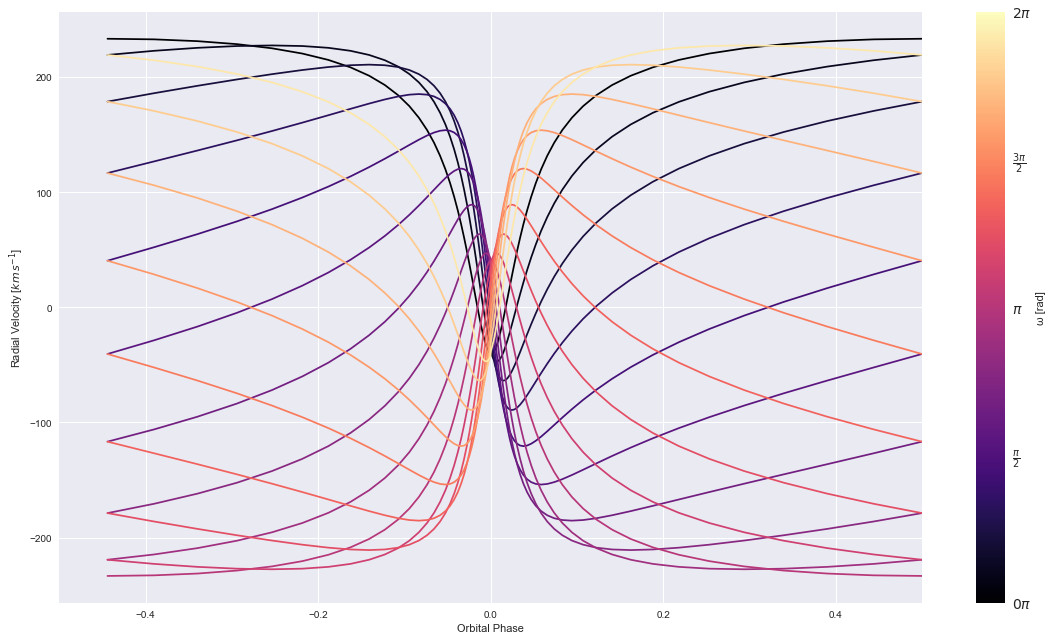

In [17]:
fig = plt.figure(figsize=(16,9))
ax = plt.gca()

colors = plt.cm.magma(np.linspace(0, 0.95, len(ω)))

cax = [ax.plot(orbit_phase, vr(true_anomaly, ω[k]), c=colors[k], label=str(ω[k].round(3))) for k in range(len(ω))]

## Setting up the color bar
sm = plt.cm.ScalarMappable(cmap=plt.cm.magma, norm=plt.Normalize(vmin=0, vmax=2*np.pi))
sm._A = []
cbar = plt.colorbar(sm, ticks=[0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])

## Plot parameters
cbar.set_label('ω [rad]')
cbar.ax.set_yticklabels([r'$0\pi$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
cbar.ax.tick_params(labelsize=14)

ax.set_xlabel('Orbital Phase')
ax.set_ylabel('Radial Velocity [$km \, s^{-1}$]')
ax.set_xlim(-0.5, 0.5)

plt.tight_layout()
plt.savefig('stacked_ω.png', dpi=300, bbox_inches='tight')

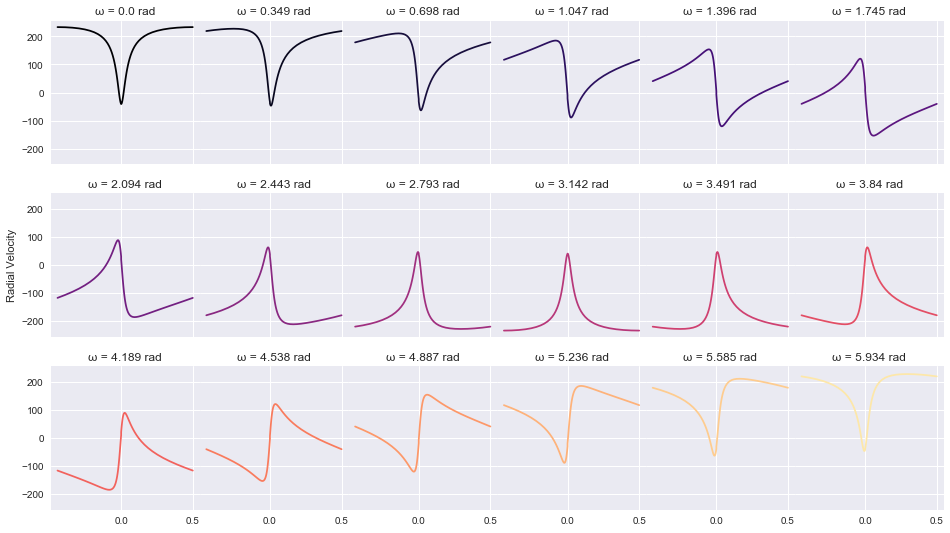

In [18]:
fig, axarr = plt.subplots(int(len(ω)/6), 6, figsize=(16, 9), sharex=True, sharey=True)

k = 0

for i in range(int(len(ω)/6)):
    for j in range(6):
        axarr[i, j].plot(orbit_phase, vr(true_anomaly, ω[k]), c=colors[k]) #label=str(ω[k].round(3))
        axarr[i, j].set_title(f"ω = {ω[k].round(3)}")
        
        k += 1
        
axarr[1, 0].set_ylabel('Radial Velocity')
axarr[1, 0].set_ylabel('Radial Velocity')
    
fig.subplots_adjust(wspace=0)
plt.savefig('ω.png', dpi=300, bbox_inches='tight')

___
## (3) Period search using radial velocity data

File rv2346.dat is a set of 48 measurements of the heliocentric radial velocity of the central star of the planetary nebula NGC 2346. The first column gives the heliocentric Julian date (the number 2400000 has been subtracted). The second column gives the heliocentric radial velocities in km/s.

In [19]:
import pandas as pd

In [20]:
dat = np.genfromtxt('rv2346.dat')
df = pd.DataFrame(dat)
del dat
df. columns = ['HJD', 'v']
df.HJD = df.HJD * u.day
df.v = df.v  * (u.km / u.s)
df.head()

,HJD,v
0,43138.660,5.0
1,43140.654,23.0
2,43141.829,26.0
3,43142.775,26.0
4,43143.702,36.0


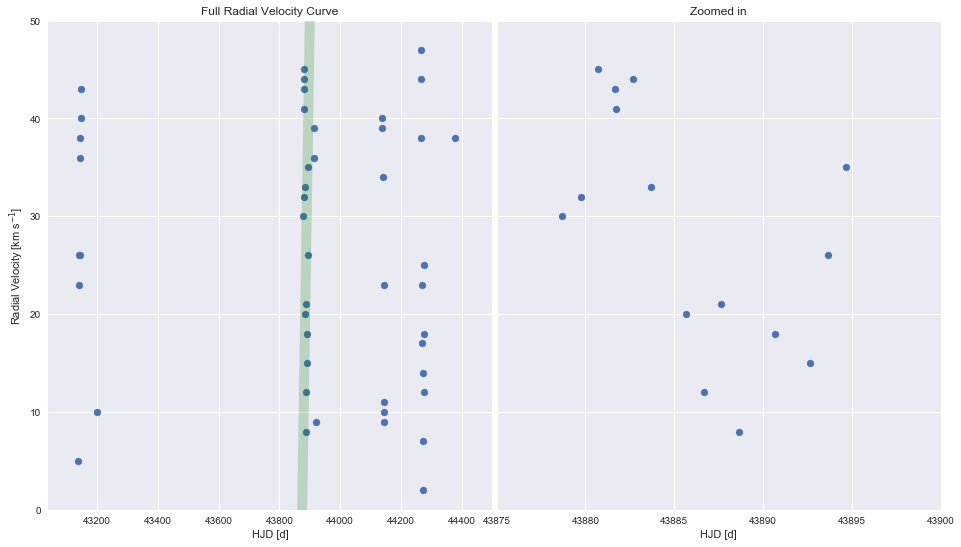

In [21]:
fig, axarr = plt.subplots(1, 2, figsize=(16,9), sharey=True)
axarr[0].scatter(df.HJD, df.v)
axarr[0].set_xlim(df.HJD.min()-100, 44500)
axarr[0].plot([43875, 43900], [0, 50], color='g', lw=10, alpha=0.2)

axarr[0].set_xlabel('HJD [d]')
axarr[0].set_ylabel('Radial Velocity [km s$^{-1}$]')
axarr[0].set_title('Full Radial Velocity Curve')

axarr[1].scatter(df.HJD, df.v)
axarr[1].set_xlim(43875, 43900)
axarr[1].set_ylim(0, 50)
axarr[1].set_xlabel('HJD [d]')
axarr[1].set_title('Zoomed in')

fig.subplots_adjust(wspace=0.01)
plt.savefig('LC.png', dpi=300, bbox_inches='tight')

___
## (3.1) Method of Lafler and Kinman

Write a computer program that will read all the data and calculate the parameter Θ defined by Lafler and Kinman (1965, ApJS, 11, 216) for a given set of periods (you have to define an initial period, a final period, and an increment). For every period to be tested, you have to calculate the orbital phases and sort them. 

Start by making a broad search for periods between 3 and 40 days, with a large increment. Find the few best values of Θ and plot the radial velocity curves. Which period looks more plausible? 

Now reduce the period range around the selected period and reduce the increment. Run your program again to improve the period determination.

Report your final P determination and plot the final radial velocity curve. Measure the semiamplitude of the radial velocity curve. What is the binary system’s radial velocity? Verify in the SIMBAD database if this agrees with the radial velocity of the planetary nebula.

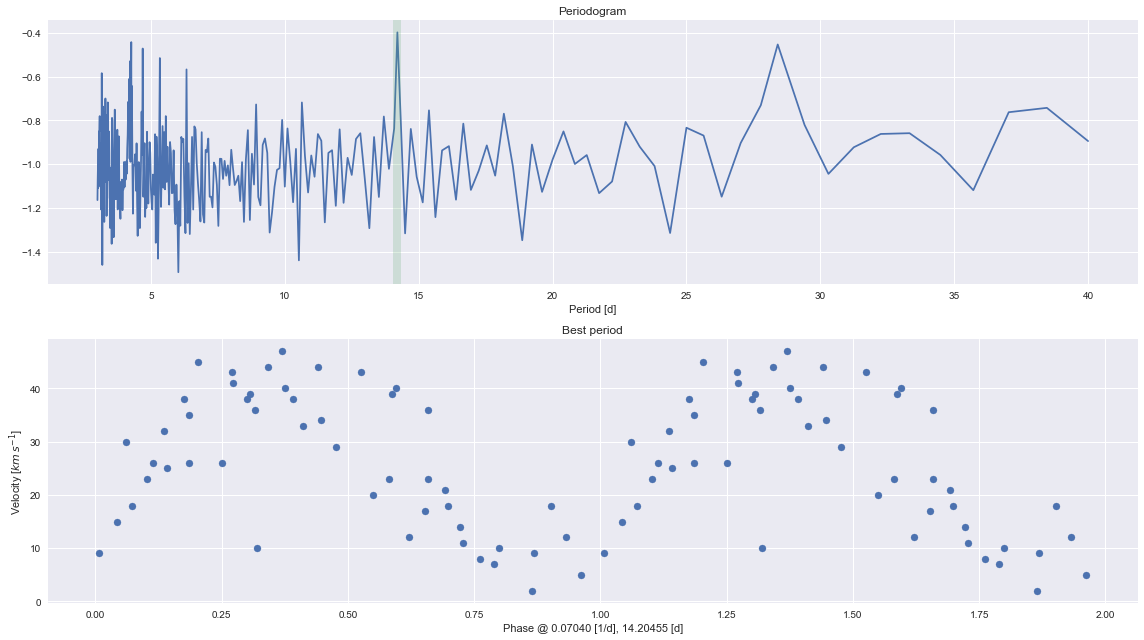

In [22]:
import P4J
vel = df.v.values
hjd = df.HJD.values
err = np.ones(len(vel))

my_per = P4J.periodogram(method='LKSL')

my_per.set_data(hjd, vel, err)
my_per.frequency_grid_evaluation(fmin=1./40., fmax=1./3., fresolution=1e-3)
my_per.finetune_best_frequencies(fresolution=1e-4, n_local_optima=10)
freq, per = my_per.get_periodogram()
fbest, pbest = my_per.get_best_frequencies()

fig, axarr = plt.subplots(2, figsize=(16,9))

axarr[0].plot(1./freq, per)
ymin, ymax = axarr[0].get_ylim()
axarr[0].plot([1./fbest[0], 1./fbest[0]], [ymin, ymax], linewidth=8, alpha=0.2)
axarr[0].set_ylim([ymin, ymax])
axarr[0].set_xlabel('Period [d]')
axarr[0].set_title('Periodogram')

phase = np.mod(hjd, 1.0/fbest[0])*fbest[0]
idx = np.argsort(phase)
axarr[1].scatter(np.concatenate([np.sort(phase), np.sort(phase)+1.0]), 
            np.concatenate([vel[idx], vel[idx]]))
axarr[1].set_title('Best period')
axarr[1].set_xlabel('Phase @ %0.5f [1/d], %0.5f [d]' %(fbest[0], 1.0/fbest[0]))
axarr[1].set_ylabel(r'Velocity [$km\,s^{-1}$]')
plt.tight_layout()

plt.savefig("LKSL.png", dpi=300, bbox_inches='tight')

___
## (3.2) Lomb-Scargle Method

Find a Python implementation of the Lomb-Scargle method and build the periodogram. See if you can confirm the period determined in the previous subsection.

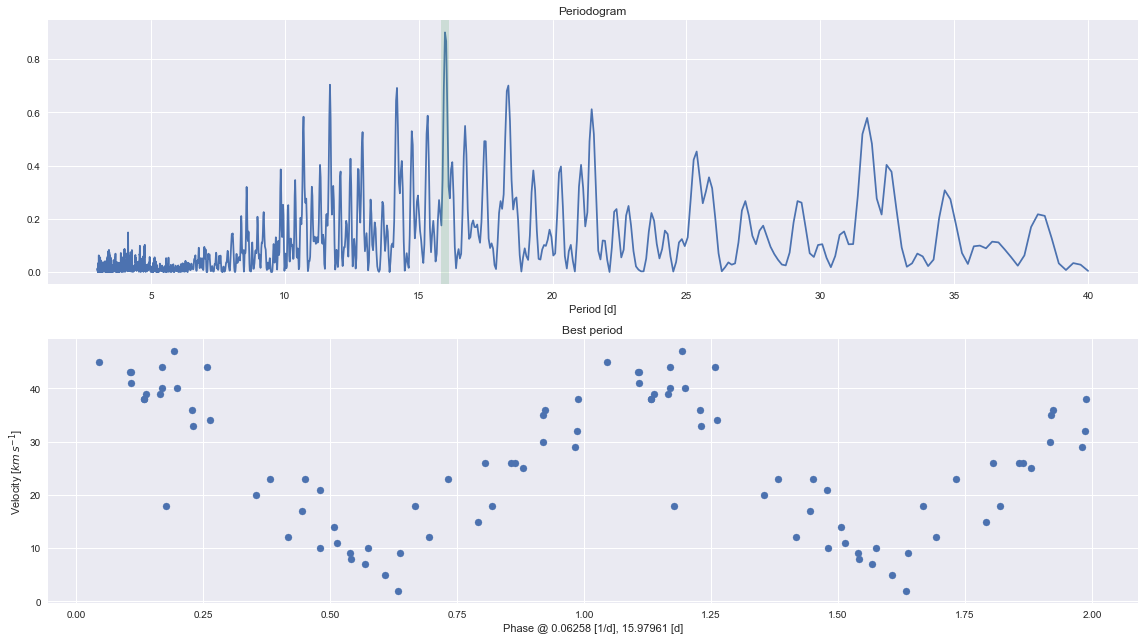

In [23]:
from astropy.stats import LombScargle

frequency, power = LombScargle(hjd[0:-3], vel[0:-3]).autopower(minimum_frequency=1./40., maximum_frequency=1./3.)

period = 1.0/frequency
best_freq = frequency[np.argmax(power)]

fig, axarr = plt.subplots(2, figsize=(16,9))

axarr[0].plot(period, power)
ymin, ymax = axarr[0].get_ylim()
axarr[0].plot([1./best_freq, 1./best_freq], [ymin, ymax], linewidth=8, alpha=0.2)
axarr[0].set_ylim(ymin, ymax)
axarr[0].set_xlabel('Period [d]')
axarr[0].set_title('Periodogram')


phase = np.mod(hjd, 1./best_freq)*best_freq
idx = np.argsort(phase)

axarr[1].scatter(np.concatenate([np.sort(phase), np.sort(phase)+1.0]), 
            np.concatenate([vel[idx], vel[idx]]))
axarr[1].set_title('Best period')
axarr[1].set_xlabel('Phase @ %0.5f [1/d], %0.5f [d]' %(best_freq, 1.0/best_freq))
axarr[1].set_ylabel(r'Velocity [$km\,s^{-1}$]')

plt.tight_layout()
plt.savefig("LS.png", dpi=300, bbox_inches='tight')

http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1981ApJ...250..240M&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf